<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220612.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor
* customer analysis

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [4]:
raw = skd.load_wine()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
pca = PCA(n_components = 10)
fit_pca = pca.fit_transform(x)
fit_pca

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00, ...,
        -1.99555377e-01,  7.01280283e-01, -9.50075663e-02],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00, ...,
         6.04714449e-01,  2.86716849e-01, -4.57819758e-02],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00, ...,
        -5.00885700e-01,  2.45466567e-02, -2.08959774e-01],
       ...,
       [ 8.84580737e+01,  1.87762846e+01, -2.23757651e+00, ...,
         6.89656773e-02,  2.73674694e-01, -4.53356039e-02],
       [ 9.34562419e+01,  1.86708191e+01, -1.78839152e+00, ...,
        -1.45646635e-01,  2.54467749e-01,  5.92107103e-02],
       [-1.86943190e+02, -2.13330803e-01, -5.63050984e+00, ...,
        -2.42246875e-01, -1.23226106e-01,  2.99079952e-01]])

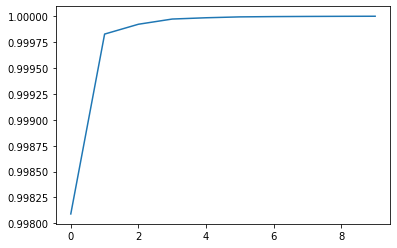

In [10]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [12]:
res_pca = pd.DataFrame(np.c_[fit_pca, y.reshape(-1,1)], columns = [f'pc{a}' for a in range(1, 11)] + ['target'])
res_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,318.562979,21.492131,3.130735,-0.250114,0.677078,0.568081,-0.619642,-0.199555,0.701280,-0.095008,0.0
1,303.097420,-5.364718,6.822835,-0.864035,-0.486096,0.014340,0.108865,0.604714,0.286717,-0.045782,0.0
2,438.061133,-6.537309,-1.113223,0.912411,0.380651,0.672404,0.785819,-0.500886,0.024547,-0.208960,0.0
3,733.240139,0.192729,-0.917257,-0.541251,0.858662,0.599122,0.018770,0.190428,0.054277,0.531684,0.0
4,-11.571428,18.489995,-0.554422,1.360896,0.276442,0.768884,-0.309976,0.119091,-0.195843,0.061771,0.0


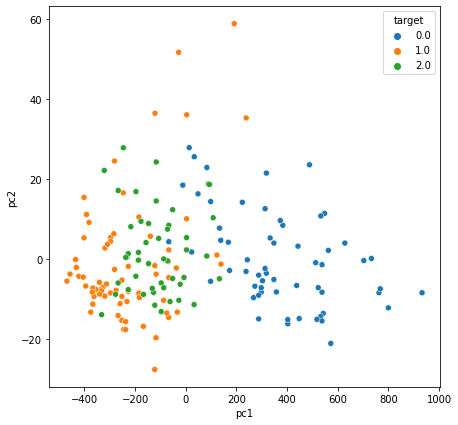

In [14]:
plt.figure(figsize = [7,7])
sns.scatterplot(data = res_pca.assign(target = res_pca.target.astype('str')), 
                x = 'pc1', y = 'pc2', hue = 'target')

In [19]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [28]:
scaler = StandardScaler()
x_tr_std = scaler.fit_transform(x_tr)
x_te_std = scaler.transform(x_te)

In [29]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
fit_rf_std = RandomForestClassifier().fit(x_tr_std, y_tr)

In [30]:
pred_rf = fit_rf.predict(x_te)
pred_rf_std = fit_rf.predict(x_te_std)

proba_rf = fit_rf.predict_proba(x_te)[:,-1]
proba_rf_std = fit_rf.predict_proba(x_te_std)[:,-1]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [31]:
accuracy_score(pred_rf, y_te), accuracy_score(pred_rf_std, y_te)

(0.9629629629629629, 0.4074074074074074)

In [54]:
y_dummies = pd.get_dummies(pd.DataFrame(y_te, columns = ['y']), columns = ['y'])
y_dummies.head()

,y_0,y_1,y_2
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [57]:
fpr1, tpr1, thre1 = roc_curve(y_dummies.iloc[:, -1], proba_rf)
fpr2, tpr2, thre2 = roc_curve(y_dummies.iloc[:, -1], proba_rf_std)

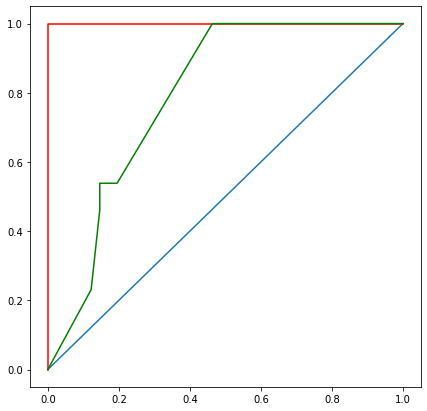

In [58]:
plt.figure(figsize = [7,7])
plt.plot([0,1], [0,1])
plt.plot(fpr1, tpr1, color = 'red')
plt.plot(fpr2, tpr2, color = 'green')


# customer analysis

In [59]:
os.listdir()

['.config',
 'online_retail_II.xlsx',
 'retail_data_transactions.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'ecommerce-data.csv',
 'rfm_test.csv',
 'retail_data_response.csv',
 'sample_data']

In [181]:
df = pd.read_excel('online_retail_II.xlsx')

In [182]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [183]:
df = df[~df['Customer ID'].isnull()]

In [184]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [185]:
df.columns = [a.lower() for a in df.columns]
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [186]:
df = df[(df['country'] == 'United Kingdom') & (~df['invoice'].astype(str).str.contains('C'))]
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [187]:
df['rev'] = df['price'] * df['quantity']
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,invoice,stockcode,description,quantity,invoicedate,price,customer id,country,rev
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [188]:
df = df[['customer id', 'invoicedate', 'rev']]
df.columns = ['id', 'ts', 'rev']
df.head()

,id,ts,rev
0,13085.0,2009-12-01 07:45:00,83.4
1,13085.0,2009-12-01 07:45:00,81.0
2,13085.0,2009-12-01 07:45:00,81.0
3,13085.0,2009-12-01 07:45:00,100.8
4,13085.0,2009-12-01 07:45:00,30.0


In [189]:
df['ts'] = df['ts'].to_numpy().astype('datetime64[m]')
df.head()

,id,ts,rev
0,13085.0,2009-12-01 07:45:00,83.4
1,13085.0,2009-12-01 07:45:00,81.0
2,13085.0,2009-12-01 07:45:00,81.0
3,13085.0,2009-12-01 07:45:00,100.8
4,13085.0,2009-12-01 07:45:00,30.0


In [190]:
df['month'] = df['ts'].to_numpy().astype('datetime64[M]')
df = df.sort_values(['id', 'ts'], ascending = [1, 1])
df.head()

,id,ts,rev,month
27994,12346.0,2009-12-14 08:34:00,45.0,2009-12-01
28251,12346.0,2009-12-14 11:00:00,22.5,2009-12-01
28254,12346.0,2009-12-14 11:02:00,22.5,2009-12-01
39398,12346.0,2009-12-18 10:47:00,22.5,2009-12-01
39411,12346.0,2009-12-18 10:55:00,1.0,2009-12-01


## retention

In [191]:
list_pu = df.groupby(['id', 'month']).first().reset_index()
list_npu = df.groupby(['id']).first().reset_index()

In [192]:
list_mon = list_pu['month'].sort_values().unique()

In [193]:
for mon in list_mon : 

  #mon = list_mon[6]
  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[(list_pu['id'].isin(temp_npu['id']))]
  temp = temp_pu.groupby(['month']).agg({'ts':'count'}).reset_index()
  temp = temp.assign(npu_month = mon,
              num = temp['month'].rank().astype(int)
              )
  temp = temp[['npu_month', 'num', 'ts']].rename(columns = {'ts':'pu'})
  temp = temp.assign(ratio = (temp['pu'].to_numpy())/temp['pu'].max())

  if mon == list_mon[0] :

    res = temp

  else : 

    res = pd.concat([res, temp], axis = 0)

res.head()

,npu_month,num,pu,ratio
0,2009-12-01,1,904,1.000000
1,2009-12-01,2,318,0.351770
2,2009-12-01,3,298,0.329646
3,2009-12-01,4,382,0.422566
4,2009-12-01,5,342,0.378319


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


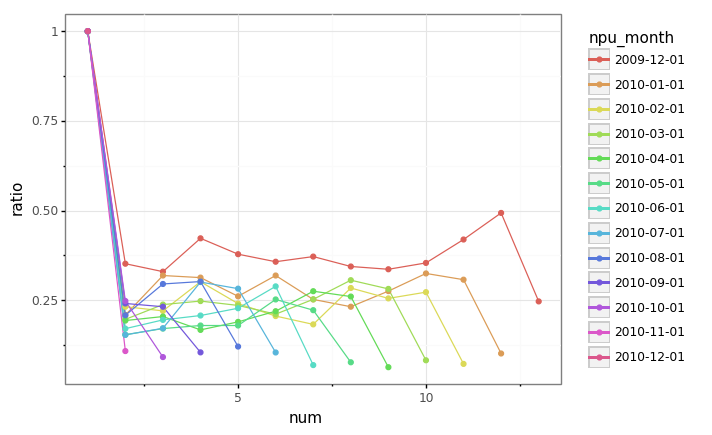

<ggplot: (8764859747961)>

In [194]:
(
    ggplot(res.assign(npu_month = res.npu_month.astype(str)),
                      aes('num', 'ratio', color = 'npu_month')
                      ) +
    gg.geom_line() +
    gg.geom_point() +
    gg.theme_bw()
)

# RFM

In [195]:
df.head()

,id,ts,rev,month
27994,12346.0,2009-12-14 08:34:00,45.0,2009-12-01
28251,12346.0,2009-12-14 11:00:00,22.5,2009-12-01
28254,12346.0,2009-12-14 11:02:00,22.5,2009-12-01
39398,12346.0,2009-12-18 10:47:00,22.5,2009-12-01
39411,12346.0,2009-12-18 10:55:00,1.0,2009-12-01


In [197]:
df['date'] = df['ts'].to_numpy().astype('datetime64[D]')
df.head()

,id,ts,rev,month,date
27994,12346.0,2009-12-14 08:34:00,45.0,2009-12-01,2009-12-14
28251,12346.0,2009-12-14 11:00:00,22.5,2009-12-01,2009-12-14
28254,12346.0,2009-12-14 11:02:00,22.5,2009-12-01,2009-12-14
39398,12346.0,2009-12-18 10:47:00,22.5,2009-12-01,2009-12-18
39411,12346.0,2009-12-18 10:55:00,1.0,2009-12-01,2009-12-18


In [297]:
info_m = df.groupby(['id', 'month']).agg({'rev': 'sum'}).reset_index()
info_f = df.groupby(['id', 'month']).agg({'date' : 'count'}).reset_index()
info_m.columns = ['id', 'month', 'money']
info_f.columns = ['id', 'month', 'freq']
info_m.head()

,id,month,money
0,12346.0,2009-12-01,113.50
1,12346.0,2010-01-01,90.00
2,12346.0,2010-03-01,27.05
3,12346.0,2010-06-01,142.31
4,12608.0,2010-10-01,415.79


In [321]:
info_m2 = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m2.columns.name = None
info_m2 = pd.melt(info_m2, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'])
info_m2 = info_m2.groupby('id')['money'].sum().reset_index()

info_f2 = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f2.columns.name = None
info_f2 = pd.melt(info_f2, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'month'])
info_f2 = info_f2.groupby(['id']).head(3)
info_f2 = info_f2.groupby('id')['freq'].sum().reset_index()

In [218]:
info_r = df.groupby(['id', 'date']).first().sort_values(['id', 'date'], ascending = [1, 0]).reset_index()
info_r.head()

,id,date,ts,rev,month
0,12346.0,2010-06-28,2010-06-28 13:53:00,7.49,2010-06-01
1,12346.0,2010-03-02,2010-03-02 13:08:00,3.25,2010-03-01
2,12346.0,2010-01-22,2010-01-22 13:30:00,22.50,2010-01-01
3,12346.0,2010-01-14,2010-01-14 13:50:00,22.50,2010-01-01
4,12346.0,2010-01-04,2010-01-04 09:24:00,22.50,2010-01-01


In [275]:
list_id = info_r['id'].value_counts()[info_r['id'].value_counts() != 1]
info_r = info_r[info_r['id'].isin(list_id.index)]
info_r['date'] = pd.to_datetime(info_r['date'])
info_r.head()

,id,date,ts,rev,month
0,12346.0,2010-06-28,2010-06-28 13:53:00,7.49,2010-06-01
1,12346.0,2010-03-02,2010-03-02 13:08:00,3.25,2010-03-01
2,12346.0,2010-01-22,2010-01-22 13:30:00,22.50,2010-01-01
3,12346.0,2010-01-14,2010-01-14 13:50:00,22.50,2010-01-01
4,12346.0,2010-01-04,2010-01-04 09:24:00,22.50,2010-01-01


In [276]:
info_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14280 entries, 0 to 15652
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      14280 non-null  float64       
 1   date    14280 non-null  datetime64[ns]
 2   ts      14280 non-null  datetime64[ns]
 3   rev     14280 non-null  float64       
 4   month   14280 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2)
memory usage: 669.4 KB


In [286]:
info_r = info_r.groupby(['id'])['date'].apply(lambda x : x.iloc[0] - x.iloc[1]).dt.days.reset_index().rename(columns = {'date':'recency'})
info_r.head()

,id,recency
0,12346.0,118
1,12745.0,88
2,12747.0,19
3,12748.0,1
4,12749.0,26


In [334]:
info = pd.merge(info_f2, info_m2, 'left', 'id')
info = pd.merge(info, info_r, 'left', 'id')
info = info[~info['recency'].isnull()]
info.head()

,id,freq,money,recency
0,12346.0,9.0,372.86,118.0
2,12745.0,0.0,723.85,88.0
4,12747.0,36.0,5080.53,19.0
5,12748.0,428.0,22879.66,1.0
6,12749.0,0.0,2806.48,26.0


In [344]:
info = info.assign(m = pd.qcut(info['money'], 5, list('54321')),
            r = pd.qcut(info['recency'], 5, list('54321')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('12345'))
            )
info = info.assign(rf = info['r'].astype(str) + info['f'].astype(str))
info.head()

,id,freq,money,recency,m,r,f,rf
0,12346.0,9.0,372.86,118.0,5,2,3,23
2,12745.0,0.0,723.85,88.0,4,2,1,21
4,12747.0,36.0,5080.53,19.0,1,4,4,44
5,12748.0,428.0,22879.66,1.0,1,5,5,55
6,12749.0,0.0,2806.48,26.0,2,4,1,41


In [345]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

In [349]:
info = info.assign(rf = info['rf'].replace(seg_map, regex = True))
info.head()

,id,freq,money,recency,m,r,f,rf
0,12346.0,9.0,372.86,118.0,5,2,3,At_Risk
2,12745.0,0.0,723.85,88.0,4,2,1,Hibernating
4,12747.0,36.0,5080.53,19.0,1,4,4,Loyal_Customers
5,12748.0,428.0,22879.66,1.0,1,5,5,Champions
6,12749.0,0.0,2806.48,26.0,2,4,1,Promising


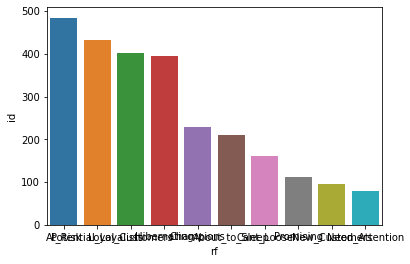

In [357]:
cnt_seg = info.groupby('rf')['id'].count().reset_index().sort_values(['id'],ascending = 0)
sns.barplot(data = cnt_seg, x = 'rf', y = 'id')